In [42]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from sklearn.cluster import KMeans

## Introduction

In this notebook, we will explore how to model a dataset using a mixture of Gaussian distributions. We will start with an empirical dataset, use KMeans clustering to estimate the parameters of the Gaussian components, and then visualize the results. Finally, we will extend the analysis to detect outliers in the dataset.

Data Preparation

We begin by defining our observed dataset. This dataset represents temperature measurements in degrees Celsius.

In [43]:
# Simulate Observed data for empirical distribution
data = np.append(np.random.normal(loc=25, scale=2, size=1000),np.random.normal(loc=28,scale = 1,size = 1000))
data[0:5]

array([25.21711348, 25.20498531, 24.77965989, 25.19601936, 23.48983018])

## Reshape Data for Clustering

KMeans clustering requires the input data to be in a 2D format. We reshape the data accordingly.

In [44]:
# Reshape the data for clustering (KMeans requires 2D input)
data_reshaped = data.reshape(-1, 1)

## Estimate Mixture Model Parameters Using KMeans

We use KMeans clustering to estimate the parameters of the Gaussian mixture model. Specifically, we:

  -  Fit the KMeans model to the data.

  -  Extract the cluster centers (means) and labels.

  -  Calculate the standard deviations and weights for each cluster.

Note: Assuming this is a real life example, we have to make an initial guess as to how many models to mix initially. You may have some idea based on some prior known assumption of the data or by simply plotting the marginal distribution.

In [45]:
# Use KMeans clustering to estimate the mixture model parameters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_reshaped)

# Get the means, standard deviations (stds), and weights from the KMeans result
means = kmeans.cluster_centers_.flatten()  # Means of each Gaussian component
labels = kmeans.labels_

# Calculate standard deviations and weights
stds = [np.std(data[labels == i]) for i in range(2)]  # Standard deviation for each cluster
weights = [np.sum(labels == i) / len(data) for i in range(2)]  # Proportion of data points in each cluster

Define the Empirical and Mixture Distributions

We define two functions:

  -  empirical_distribution: Computes the probability mass function (PMF) for the empirical data.

  -  mixture_distribution: Computes the probability density function (PDF) for the Gaussian mixture model.

In [46]:
# Define the mixture distribution
def mixture_distribution(x, weights, means, stds):
    return sum(w * norm.pdf(x, mu, sigma) for w, mu, sigma in zip(weights, means, stds))

## Visualize the Distributions

We plot the empirical distribution (as a bar plot) and the mixture distribution (as a continuous curve) to compare them.

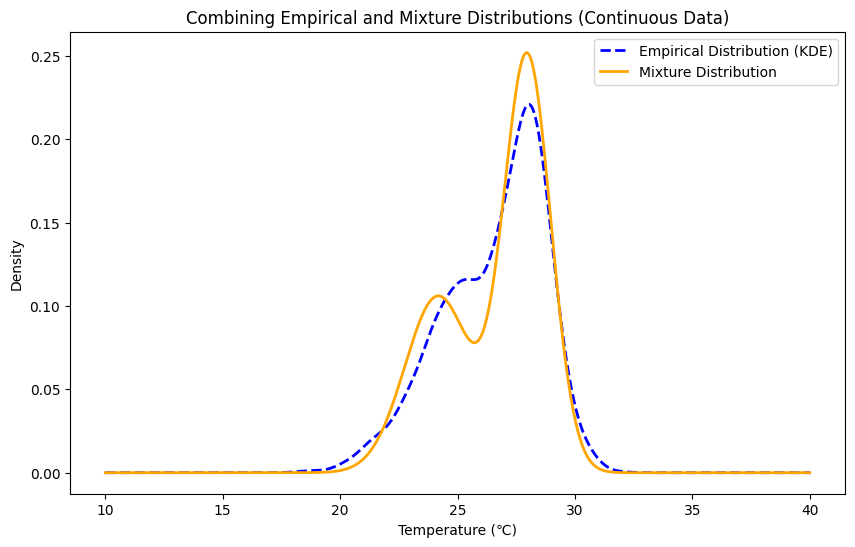

In [47]:
# Generate x values for plotting
x_values = np.linspace(10, 40, 1000)

# Compute the KDE for the empirical distribution
kde = gaussian_kde(data)
y_kde = kde(x_values)

# Compute the mixture distribution
y_mixture = mixture_distribution(x_values, weights, means, stds)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KDE for the empirical distribution
plt.plot(x_values, y_kde, label="Empirical Distribution (KDE)", linewidth=2, linestyle="--", color="blue")

# Plot the mixture distribution
plt.plot(x_values, y_mixture, label="Mixture Distribution", linewidth=2, color="orange")

plt.title("Combining Empirical and Mixture Distributions (Continuous Data)")
plt.xlabel("Temperature (℃)")
plt.ylabel("Density")
plt.legend()
plt.show()

Print Estimated Parameters

We print the estimated parameters of the Gaussian mixture model for reference. We can see that we actually get relatively close to the actual characteristics of the simulated distributions.

In [48]:
# Print the estimated parameters
print(f"Estimated Means: {means}")
print(f"Estimated Standard Deviations: {stds}")
print(f"Estimated Weights: {weights}")

Estimated Means: [24.16887305 27.96856835]
Estimated Standard Deviations: [1.4061760105860848, 1.004593155648151]
Estimated Weights: [0.373, 0.627]


## Outlier Detection

We extend the analysis to detect outliers in the dataset using the mixture model.
### Define a Threshold for Outliers

We define a threshold based on the probability density of the mixture distribution. Data points with a probability density below this threshold are considered outliers.

In [49]:
# Define a threshold for outlier detection
threshold = 0.01  # Adjust this value based on your use case

# Calculate the probability density for each data point
probabilities = mixture_distribution(data, weights, means, stds)

# Identify outliers
outliers = data[probabilities < threshold]

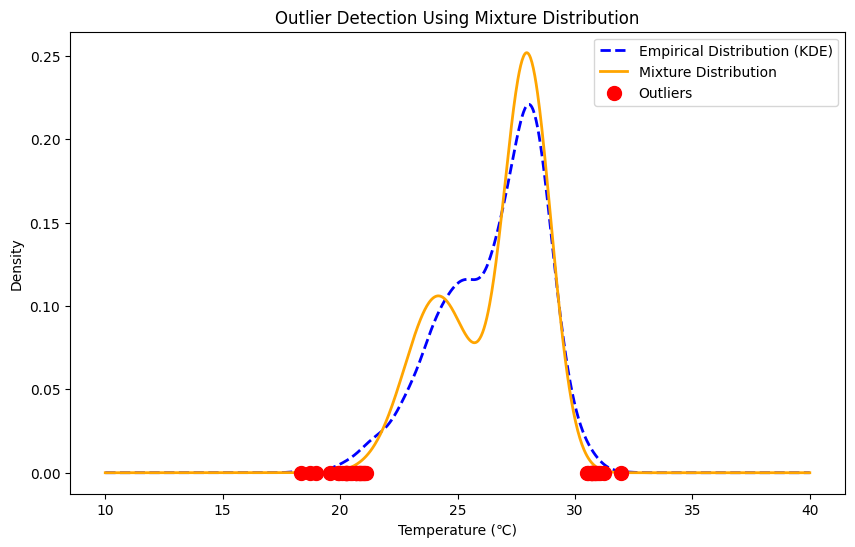

In [50]:
# Highlight outliers in the plot
plt.figure(figsize=(10, 6))

# Plot the KDE for the empirical distribution
plt.plot(x_values, y_kde, label="Empirical Distribution (KDE)", linewidth=2, linestyle="--", color="blue")

# Plot the mixture distribution
plt.plot(x_values, y_mixture, label="Mixture Distribution", linewidth=2, color="orange")

# Highlight outliers
plt.scatter(outliers, [0] * len(outliers), color='red', zorder=5, label="Outliers", s=100)

plt.title("Outlier Detection Using Mixture Distribution")
plt.xlabel("Temperature (℃)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [51]:
# Print the detected outliers
print(f"Detected Outliers: {outliers}")

Detected Outliers: [20.69531032 21.11225222 21.01205343 31.04703196 19.96225098 18.96970005
 19.92907204 20.21842636 18.70031699 20.29023919 20.86185396 20.80371097
 20.91208164 30.73506925 20.4961106  19.5706669  20.67819089 20.0908424
 20.24971312 31.21998215 18.34245464 30.51704703 20.402627   20.69391063
 20.99732283 20.89167915 20.82520024 20.26926355 20.28443492 30.85614137
 30.68784389 30.53696858 30.97402966 31.98201175 30.79354044 30.68463879
 30.71937249 30.90312157]


Conclusion

In this notebook, we:

  -  Generated synthetic data from two Gaussian distributions.

  -  Estimated the parameters of a Gaussian mixture model using KMeans clustering.

  -  Visualized the empirical distribution (using KDE) and the mixture distribution.

  -  Detected outliers using the mixture model.

This approach can be applied to real-world datasets for modeling and outlier detection tasks.